# COMPLETE THE ASSIGNMENT AND EMAIL ME YOUR NOTEBOOK
olivier.morand@uconn.edu

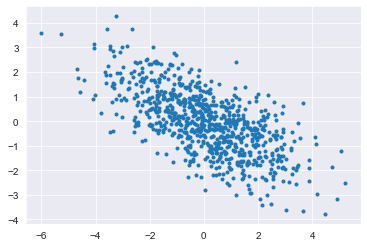

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Generate 800 random draws from a multivariate gaussian
mean = np.array([0,0])
cov = np.array([[3, -1.5], [-1.5, 1.75]])
pts = np.random.multivariate_normal(mean, cov, size = 800)

# Scatterplot of the data
plt.scatter(pts[:,0], pts[:,1], marker = '.');

# QUESTION 1: LEARN GAUSSIANMIXTURE
Type "GaussianMixture" in the search box of the sklearn doc (https://scikit-learn.org/stable/). Read the user guide as well, and understand what the purpose of GaussianMixture and how it is done.

Use GaussianMixture to extract, from the data in pts (generated above), the mean vector and covariance matrix. Show your code.

In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [3]:
gmm = GaussianMixture(n_components=3).fit(pts)
gmm.fit(pts)

GaussianMixture(n_components=3)

In [4]:
gmm = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans')
gmm.fit(pts)
cov = []
means = []
for i in range(gmm.n_components):
    cov.append(gmm.covariances_[i])
    means.append(gmm.means_[i])


In [5]:
means[0]

array([ 1.76077442, -1.04439411])

In [6]:
cov[0]

array([[ 1.30300923, -0.32672458],
       [-0.32672458,  1.07153347]])

# QUESTION 2: IMPLEMENT KMEANS ON TOYDATA
Make sure that the file "ToyData.csv" is in the same folder as this notebook.

Ignoring the type (= label, with values 0, 1, or 2), implement KMeans on the data in ToyData looking for 3 clusters (i.e., n_clusters = 3).

(a) Do a scatterplot of the data in which datapoints have a color corresponding to their assigned KMeans cluster. Next to it, or below it, do another scatterplot of the data with the color corresponding to their type.

(b) How many points are misclassified by your KMeans clustering? Do another scatterplot of the data, red for the misclassified points, blue for the properly classified.

(c) OPTIONAL (If you have the time): Try DBSCAN.

In [7]:
df2 = pd.read_csv('ToyData.csv')

In [8]:
df2

,Unnamed: 0,x,y,type
0,0,-1.803655,0.745647,0.0
1,1,1.510320,-0.150764,0.0
2,2,-1.741396,1.270800,0.0
3,3,-1.459875,1.616949,0.0
4,4,2.929753,2.794162,1.0
...,...,...,...,...
1695,1695,-3.669382,5.239110,2.0
1696,1696,-1.238587,1.496763,0.0
1697,1697,0.342930,-0.201691,0.0
1698,1698,0.596607,-0.347313,0.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1700 non-null   int64  
 1   x           1700 non-null   float64
 2   y           1700 non-null   float64
 3   type        1700 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 53.2 KB


In [10]:
from sklearn.cluster import KMeans

#km = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=0 ).fit(df2)
km = KMeans(n_clusters=3, random_state=0).fit(df2)

In [11]:
km.cluster_centers_

array([[8.54500000e+02, 2.58304729e-01, 2.11425847e+00, 7.26148410e-01],
       [2.85500000e+02, 1.53709534e-01, 2.33931437e+00, 7.84965035e-01],
       [1.41850000e+03, 2.14611438e-01, 2.35968185e+00, 7.82918149e-01]])

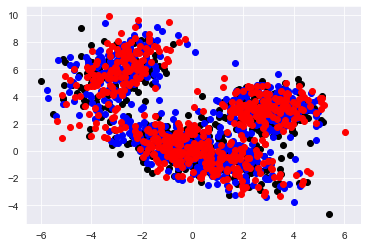

In [12]:
data = df2

# Training gaussian mixture model 

km.fit(data)

# Predictions from km
labels = km.predict(data)
data['cluster'] = labels
data.columns = ['Unnamed: 0', 'X', 'Y', 'type','cluster']

color=['black','blue','red', 'orange', 'red', 'green']
for k in range(0,6):
    graph = data[data["cluster"]==k]
    plt.scatter(graph["X"],graph["Y"],c=color[k])
plt.show()

In [13]:
# from matplotlib.colors import ListedColormap

# customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

# fig, ax = plt.subplots(figsize=(8, 6))
# plt.scatter(x=df2['X'], y=df2['Y'], s=25,
#             c=df2['type'].astype('category'), 
#             cmap = customcmap)
# ax.set_xlabel(r'x', fontsize=14)
# ax.set_ylabel(r'y', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

# 2

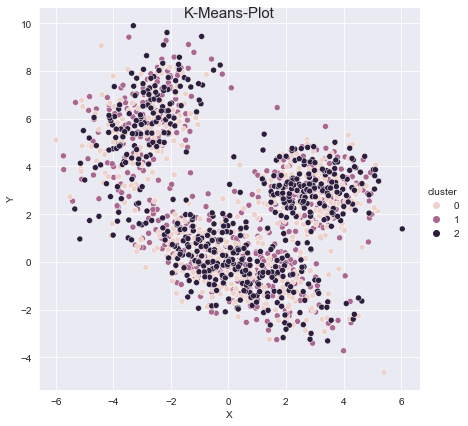

In [14]:
rel = sns.relplot(x="X", y="Y", data=df2, hue="cluster", height=6,);
rel.fig.suptitle('K-Means-Plot', size=15);

Within our graph we can see a handful of points that are misclassified above. Nonetheless, we are still able to disthingusih the 3 sections of where each point resides. 

# QUESTION 3: IMPLEMENT GAUSSIANMIXTURE ON TOYDATA

Ignoring the type, implement GaussianMixture on ToyData.csv looking for 3 distinct Gaussian distributions
(i.e. n_components = 3).

(a) Do a scatterplot of the data with their color corresponding to their type next to another of scatterplot the data with the color corresponding to their Gaussian distribution (as determined by GaussianMixture). Note: use the predict() function to predict the labels (i.e. types).

(b) How many points are misclassified by GaussianMixture? Do another scatterplot of the data, red for the misclassified points, blue for the properly classified.

In [15]:
df2

,Unnamed: 0,X,Y,type,cluster
0,0,-1.803655,0.745647,0.0,1
1,1,1.510320,-0.150764,0.0,1
2,2,-1.741396,1.270800,0.0,1
3,3,-1.459875,1.616949,0.0,1
4,4,2.929753,2.794162,1.0,1
...,...,...,...,...,...
1695,1695,-3.669382,5.239110,2.0,2
1696,1696,-1.238587,1.496763,0.0,2
1697,1697,0.342930,-0.201691,0.0,2
1698,1698,0.596607,-0.347313,0.0,2


In [16]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(df2)

gmm.predict(df2)
#plt.scatter(df2.loc[:,x], df2.loc[:, y], c=labels, s=40, cmap='viridis');

array([2, 2, 2, ..., 1, 1, 1])

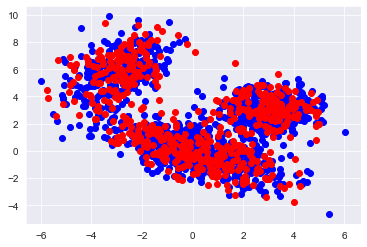

In [17]:
data = df2

# Training gaussian mixture model 

gmm.fit(data)

# Predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Unnamed: 0', 'X', 'Y', 'type','cluster']

# Only first three (black, blue, red) are represented
color=['blue','blue','red', 'orange', 'yellow', 'green']
for k in range(0,6):
    graph = frame[frame["cluster"]==k]
    plt.scatter(graph["X"],graph["Y"],c=color[k])
plt.show()

In [18]:
data

,Unnamed: 0,X,Y,type,cluster
0,0,-1.803655,0.745647,0.0,2
1,1,1.510320,-0.150764,0.0,2
2,2,-1.741396,1.270800,0.0,2
3,3,-1.459875,1.616949,0.0,2
4,4,2.929753,2.794162,1.0,2
...,...,...,...,...,...
1695,1695,-3.669382,5.239110,2.0,1
1696,1696,-1.238587,1.496763,0.0,1
1697,1697,0.342930,-0.201691,0.0,1
1698,1698,0.596607,-0.347313,0.0,1


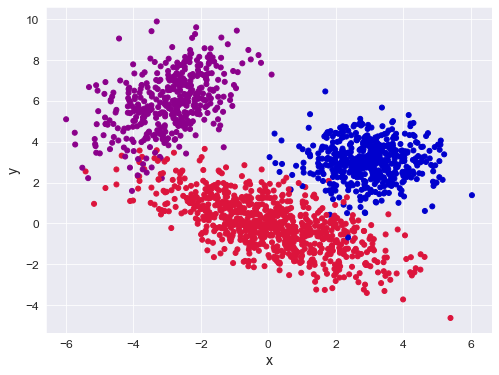

In [19]:
from matplotlib.colors import ListedColormap

customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=df2['X'], y=df2['Y'], s=25,
            c=df2['type'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

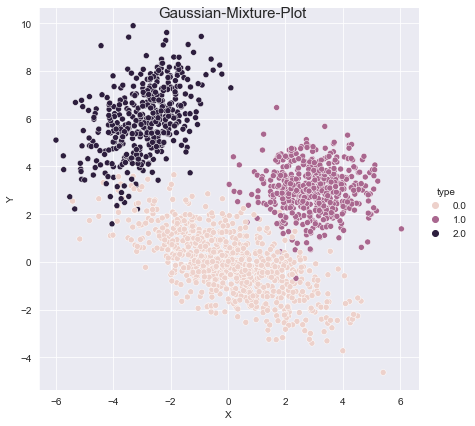

In [20]:
rel2 = sns.relplot(x="X", y="Y", data=data, hue='type', height=6,);
rel2.fig.suptitle('Gaussian-Mixture-Plot', size=15);

# QUESTION 4: LOOK FOR STRUCTURE IN SDSS DATA
Make sure the file SDSSdata.csv is in the folder where this notebook is located.

Check the scatterplots below. Try KMeans and GaussianMixture to detect some potential structure on whatever you
think is interesting in the SDSS dataset.

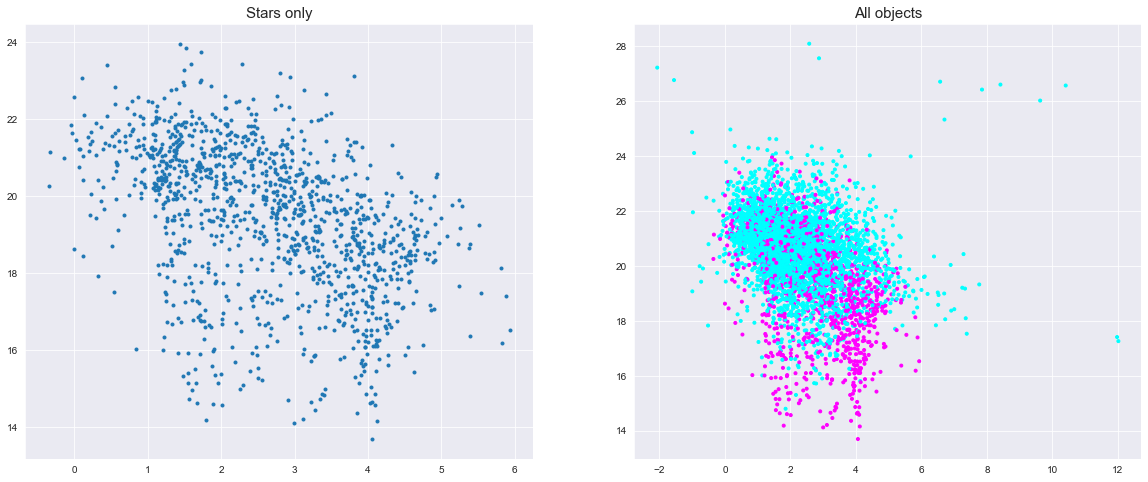

In [21]:
df = pd.read_csv('SDSSdata(4).csv')

fig, axs = plt.subplots(1,2, figsize = (20,8))
axs[0].scatter(df[df['type'] == 6].uRaw - df[df['type'] == 6].rRaw, df[df['type'] == 6].zRaw, marker = '.')
axs[0].set_title('Stars only', size = 15)
axs[1].scatter(df.uRaw - df.rRaw, df.zRaw, marker = '.', c = df.type, cmap = 'cool')
axs[1].set_title('All objects', size = 15);

# KMeans

In [22]:
# SDSSdata
km = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0 ).fit(df)

In [23]:
df

,ra,dec,uRaw,gRaw,rRaw,iRaw,zRaw,type
0,7.919656,-0.690048,25.015,23.868,21.980,21.127,20.480,3
1,9.483546,0.268299,22.597,23.054,22.190,21.461,20.839,3
2,1.565760,-0.765037,23.335,22.380,21.944,21.942,21.573,3
3,9.967965,0.729557,24.896,23.489,22.278,21.821,20.889,3
4,3.881311,0.991619,20.595,19.500,18.922,18.583,18.381,3
...,...,...,...,...,...,...,...,...
4995,6.592970,0.427179,22.075,21.494,20.711,20.475,20.329,3
4996,9.466411,-0.111300,23.241,23.241,22.320,22.233,21.100,3
4997,7.807410,-0.543046,23.528,22.046,21.590,21.547,21.282,6
4998,0.434992,-0.302785,23.140,22.345,21.877,21.650,22.991,3


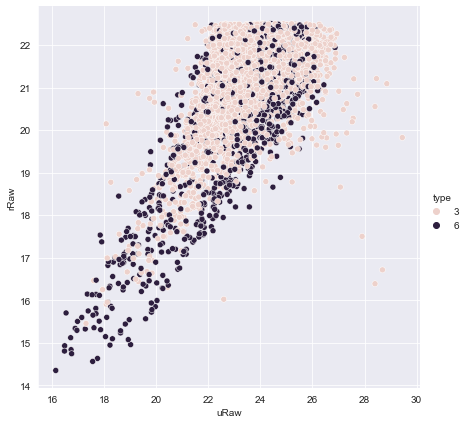

In [24]:
# uRaw and rRaw / X and Y
sns.relplot(x="uRaw", y="rRaw", data=df, hue="type", height=6,);

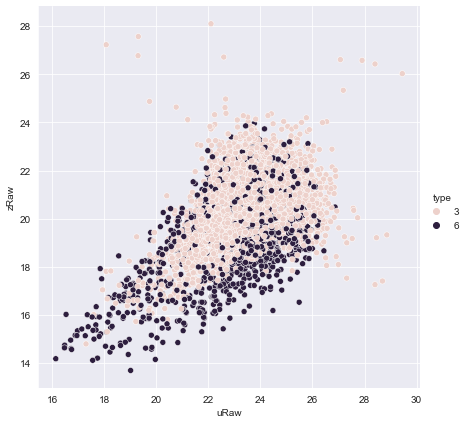

In [25]:
#uRaw and zRaw / X and Z 
sns.relplot(x="uRaw", y="zRaw", data=df, hue="type", height=6,);

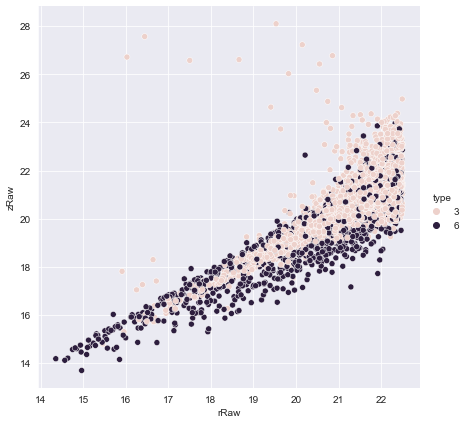

In [26]:
# rRaw and zRaw / Y and Z
sns.relplot(x="rRaw", y="zRaw", data=df, hue="type", height=6,);

# GaussianMixture

In [27]:
gmm2 = GaussianMixture(n_components=3, random_state=0).fit(df)

gmm2.predict(df)

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      5000 non-null   float64
 1   dec     5000 non-null   float64
 2   uRaw    5000 non-null   float64
 3   gRaw    5000 non-null   float64
 4   rRaw    5000 non-null   float64
 5   iRaw    5000 non-null   float64
 6   zRaw    5000 non-null   float64
 7   type    5000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 312.6 KB


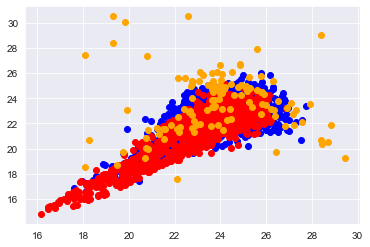

In [29]:
data = df

# Training gaussian mixture model 

gmm.fit(data)

# Predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['ra', 'dec', 'uRaw', 'gRaw','rRaw', 'iRaw', 'zRaw',
                'type', 'cluster']

# uRaw and gRaw
color=['blue','red', 'orange', 'yellow', 'green', 'black']
for k in range(0,6):
    graph = frame[frame["cluster"]==k]
    plt.scatter(graph["uRaw"],graph["gRaw"],c=color[k]);
plt.show()

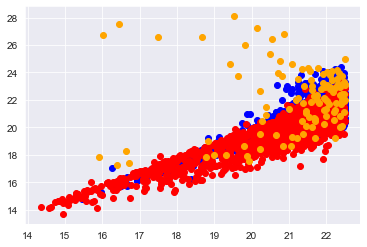

In [30]:
# rRaw and zRaw
color=['blue','red', 'orange', 'yellow', 'green', 'black']
for k in range(0,6):
    graph = frame[frame["cluster"]==k]
    plt.scatter(graph['rRaw'],graph['zRaw'],c=color[k]);
plt.show()

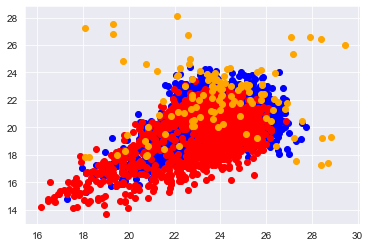

In [31]:
# uRaw and zRaw
color=['blue','red', 'orange', 'yellow', 'green', 'black']
for k in range(0,6):
    graph = frame[frame["cluster"]==k]
    plt.scatter(graph['uRaw'],graph['zRaw'],c=color[k]);
plt.show()